# Wine Quality Data Mining

**Objective:** analyze `WineQT.csv` to extract statistical insights and apply data-mining techniques (K-Means and K-NN).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

import os

plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 12



In [3]:
df = pd.read_csv('WineQT.csv')
df.shape, df.columns.tolist()

((1143, 13),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality',
  'Id'])

In [4]:
display(df.head())
display(df.describe().T)
display(df.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


None

# ---------- Statistic Tasks ----------

## Task 1 — Correlation heatmap

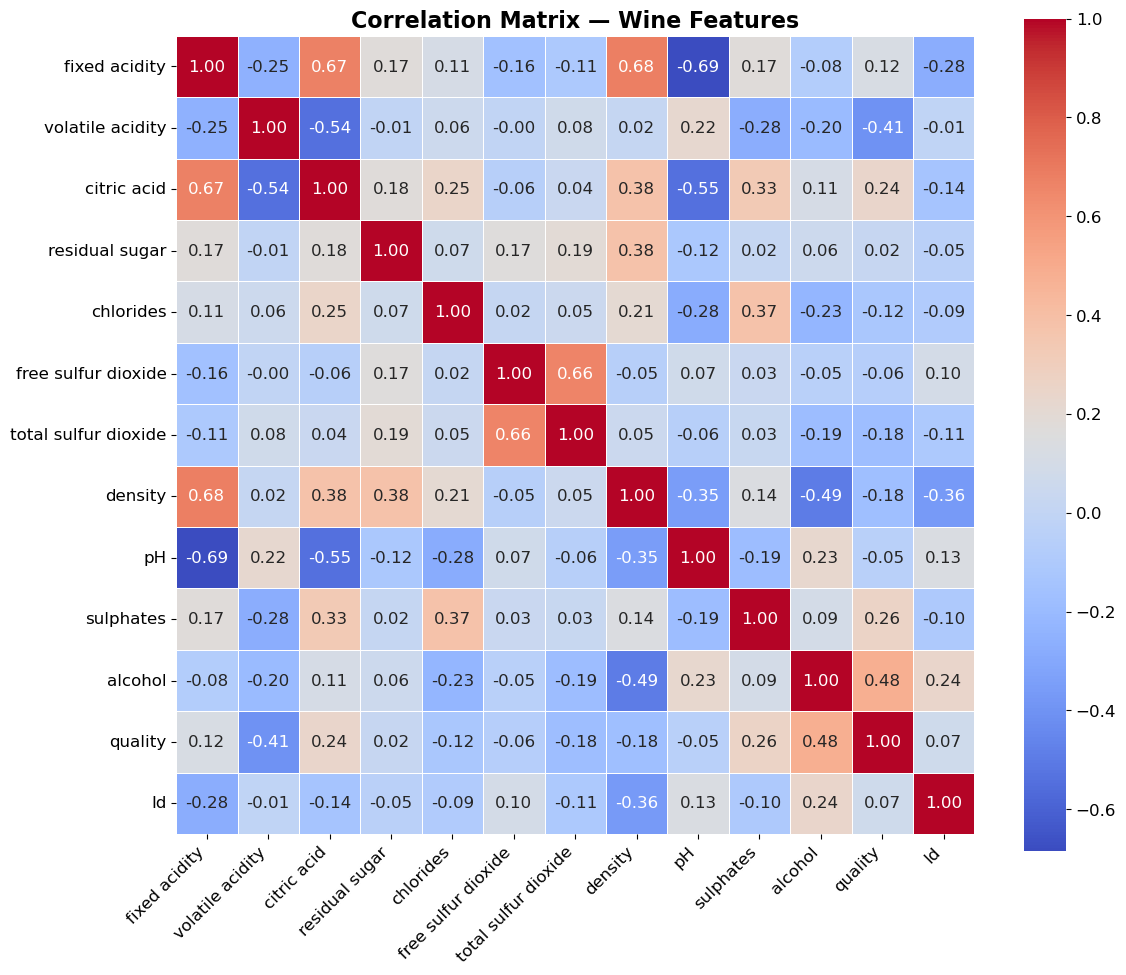

alcohol             0.484866
volatile acidity    0.407394
sulphates           0.257710
Name: quality, dtype: float64

In [7]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
corr = df[num_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix — Wine Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("corr_heatmap.png")
plt.show()

corr_with_quality = corr['quality'].drop('quality').abs().sort_values(ascending=False)
top3 = corr_with_quality.head(3)
top3

## Task 2 — Bar plots

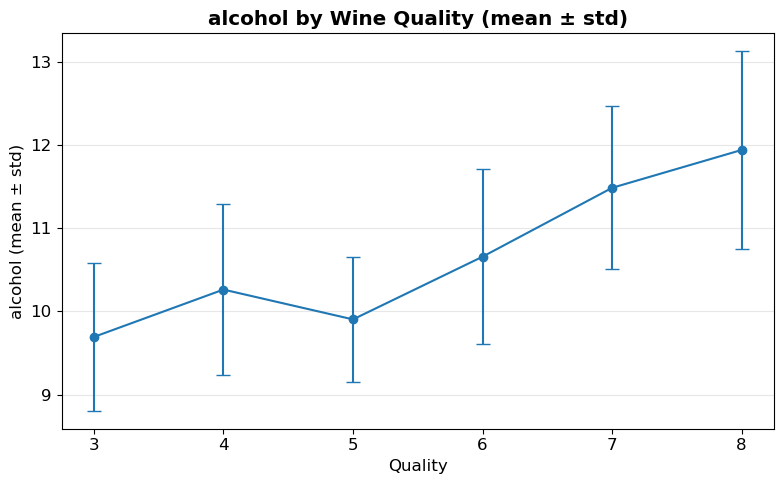

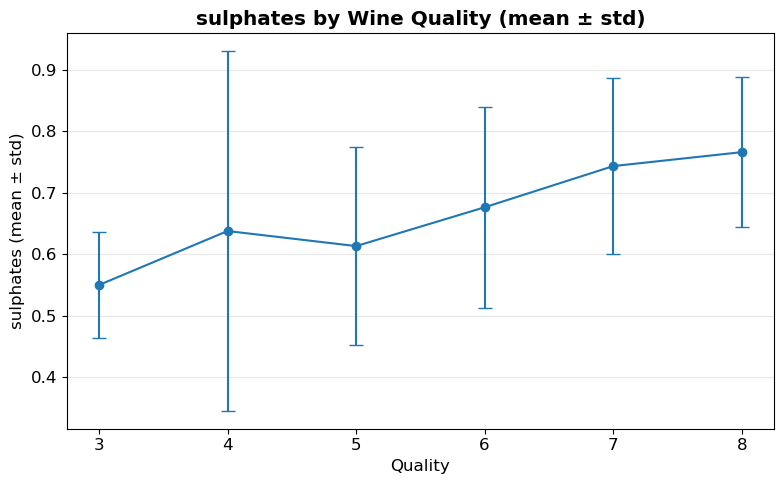

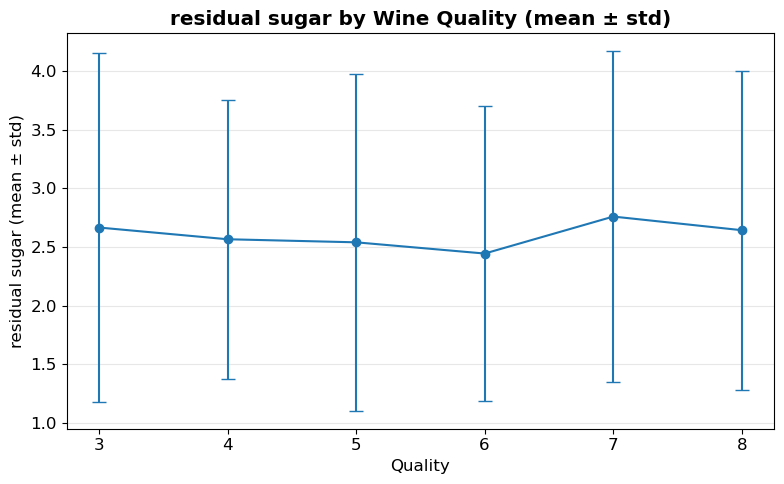

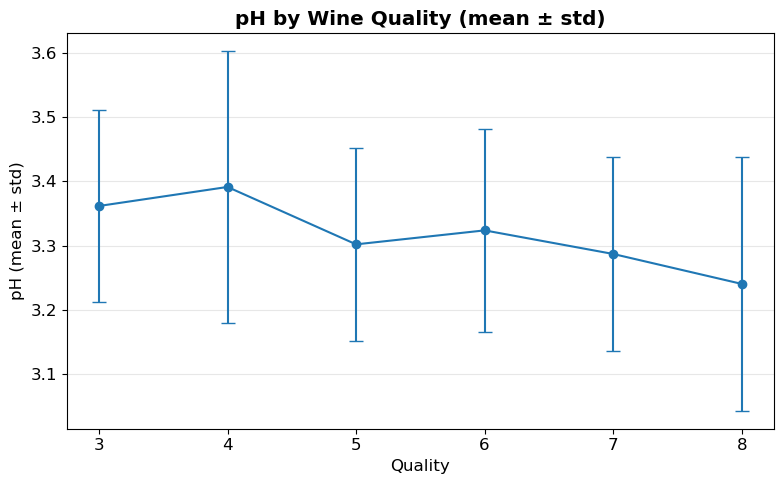

In [9]:
attrs = ['alcohol', 'sulphates', 'residual sugar', 'pH']
grouped = df.groupby('quality')[attrs].agg(['mean','std'])
grouped_columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped.columns = grouped_columns
grouped = grouped.reset_index()

for attr in attrs:
    plt.figure(figsize=(8,5))
    plt.errorbar(grouped['quality'], grouped[f'{attr}_mean'], yerr=grouped[f'{attr}_std'],
                 fmt='o-', capsize=5, markersize=6)
    plt.xlabel('Quality')
    plt.ylabel(f'{attr} (mean ± std)')
    plt.title(f'{attr} by Wine Quality (mean ± std)')
    plt.xticks(grouped['quality'])
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig("Barchart_attr_by_quality.png")
    plt.show()

## Task 3 — Line plots

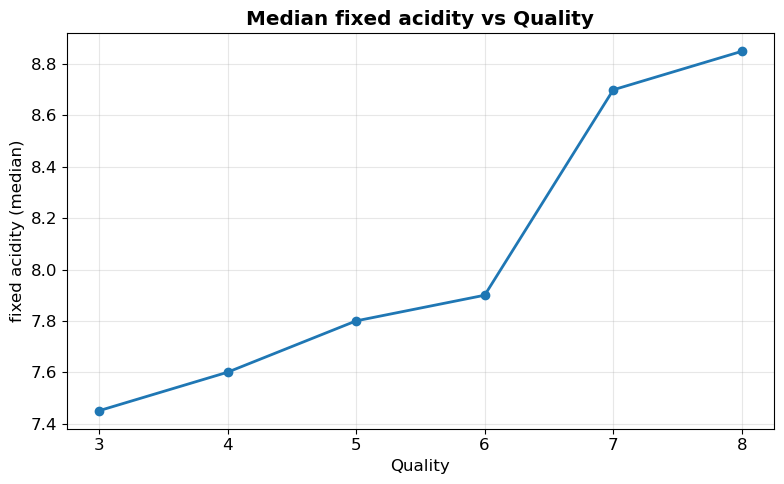

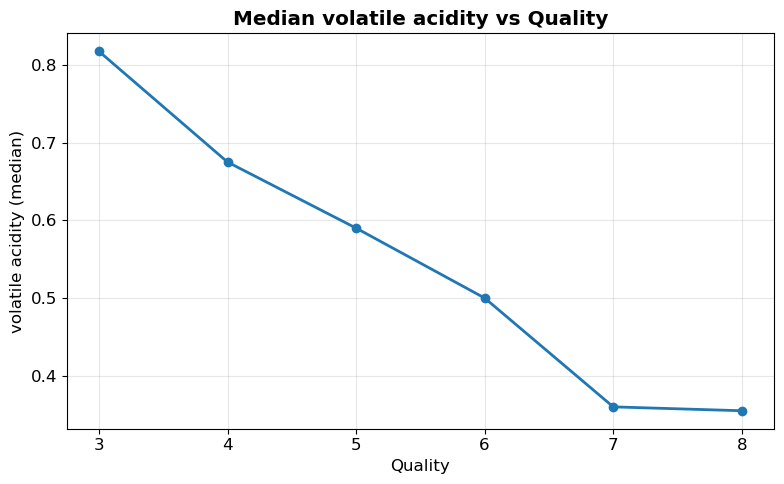

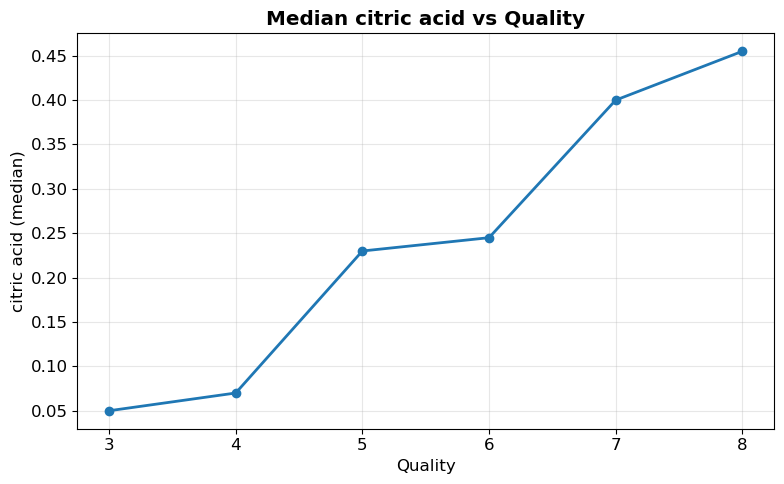

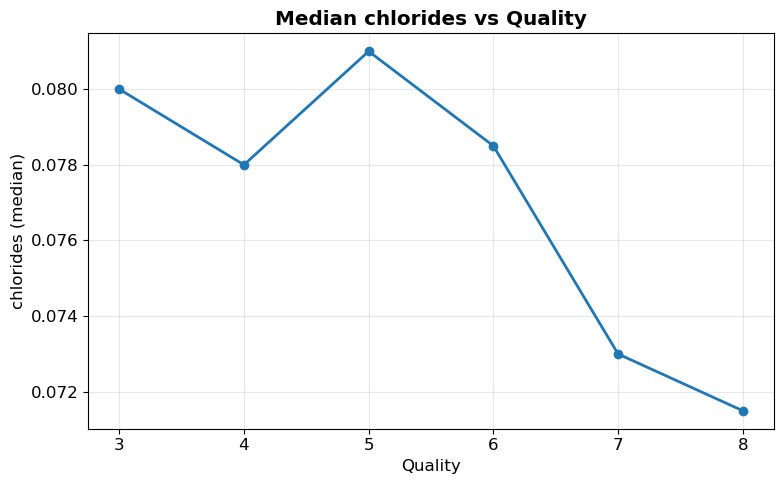

In [11]:
line_attrs = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides']
medians = df.groupby('quality')[line_attrs].median().reset_index()

for attr in line_attrs:
    plt.figure(figsize=(8,5))
    plt.plot(medians['quality'], medians[attr], marker='o', linewidth=2)
    plt.xlabel('Quality')
    plt.ylabel(f'{attr} (median)')
    plt.title(f'Median {attr} vs Quality')
    plt.xticks(medians['quality'])
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig("line_plot_attrs_medians.png")
    plt.show()

# ---------- Data Mining Tasks ----------

## K-Means Clustering

D:\Anaconda_Python_CS\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda_Python_CS\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda_Python_CS\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
D:\Anaconda_Python_CS\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

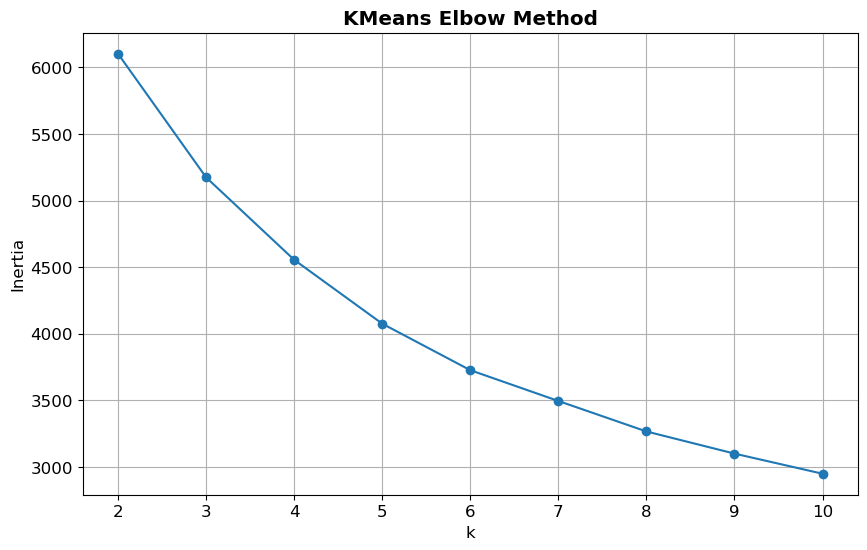

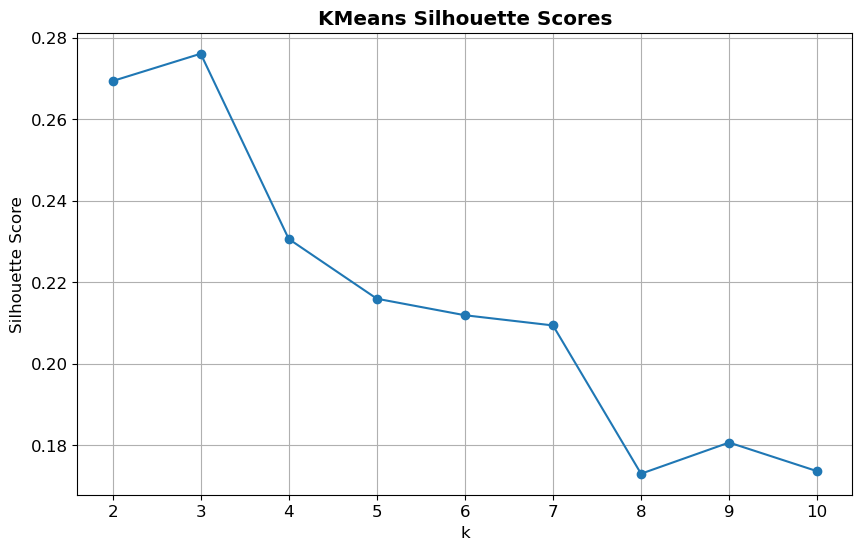

3

In [14]:
kmeans_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
                   'free sulfur dioxide', 'sulphates', 'alcohol']
X_k = df[kmeans_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_k)

inertias, silhouettes = [], []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

plt.plot(list(K_range), inertias, 'o-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.grid(True)
plt.savefig("kmeans_elbow.png")
plt.show()

plt.plot(list(K_range), silhouettes, 'o-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('KMeans Silhouette Scores')
plt.grid(True)
plt.savefig("kmeans_silhouette.png")
plt.show()

best_k = K_range[np.argmax(silhouettes)]
best_k

In [15]:
chosen_k = int(best_k)
kmeans_final = KMeans(n_clusters=chosen_k, random_state=42, n_init=10)
df['kmeans_label'] = kmeans_final.fit_predict(X_scaled)

centers = scaler.inverse_transform(kmeans_final.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=kmeans_features)
centers_df['cluster'] = range(chosen_k)
centers_df

D:\Anaconda_Python_CS\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,sulphates,alcohol,cluster
0,7.481081,0.616323,0.144452,0.080970,16.512091,0.597553,10.216880,0
1,9.684161,0.389728,0.461418,0.084085,14.133570,0.735863,10.859023,1
2,8.470588,0.540588,0.588824,0.404353,15.411765,1.200588,9.382353,2


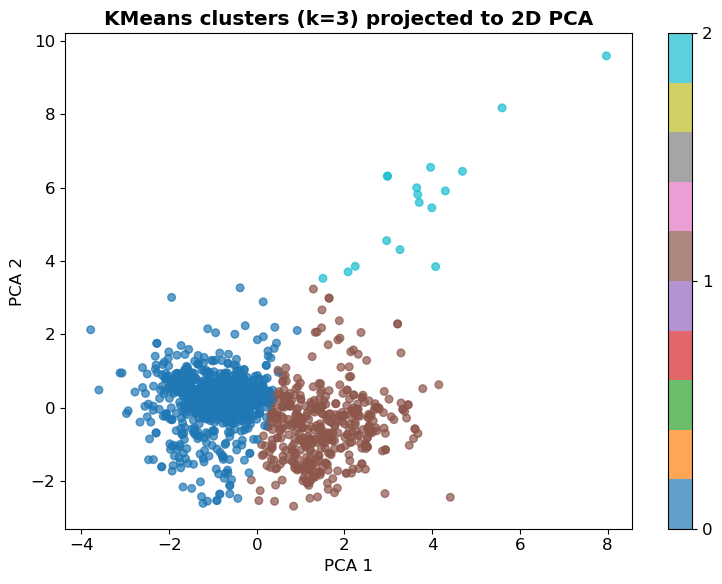

In [16]:
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
scatter = plt.scatter(proj[:,0], proj[:,1], c=df['kmeans_label'], cmap='tab10', s=30, alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'KMeans clusters (k={chosen_k}) projected to 2D PCA')
plt.colorbar(scatter, ticks=range(chosen_k))
plt.tight_layout()
plt.savefig("kmeans_pca_projection_k.png")
plt.show()

## K-Nearest Neighbors (K-NN)

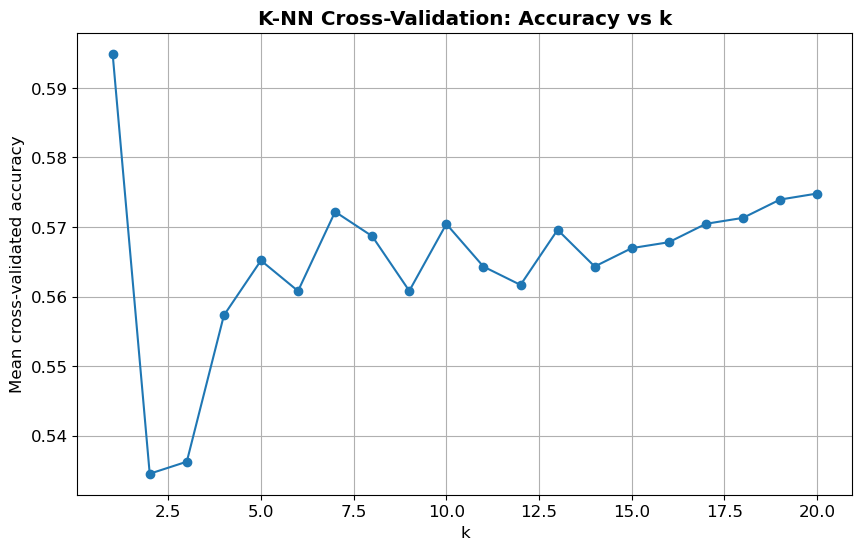

1

In [18]:
y = df['quality'].values
X_knn = df.drop(columns=['quality', 'Id'], errors='ignore')
X_knn = X_knn.select_dtypes(include=np.number)
X_knn = X_knn.drop(columns=['kmeans_label'], errors='ignore') if 'kmeans_label' in X_knn.columns else X_knn

k_values = list(range(1, 21))
cv_scores_mean = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    pipeline = Pipeline([('scaler', StandardScaler()), ('knn', knn)])
    scores = cross_val_score(pipeline, X_knn, y, cv=skf, scoring='accuracy', n_jobs=-1)
    cv_scores_mean.append(scores.mean())

plt.plot(k_values, cv_scores_mean, marker='o')
plt.xlabel('k')
plt.ylabel('Mean cross-validated accuracy')
plt.title('K-NN Cross-Validation: Accuracy vs k')
plt.grid(True)
plt.savefig("knn_cv_accuracy_vs_k.png")
plt.show()

best_k_knn = k_values[np.argmax(cv_scores_mean)]
best_k_knn

In [19]:
best_knn = KNeighborsClassifier(n_neighbors=best_k_knn)
pipe_best = Pipeline([('scaler', StandardScaler()), ('knn', best_knn)])
y_pred = cross_val_predict(pipe_best, X_knn, y, cv=skf, n_jobs=-1)
print("Classification report:")
print(classification_report(y, y_pred, zero_division=0))
print("Confusion matrix:")
print(confusion_matrix(y, y_pred))

Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.08      0.06      0.07        33
           5       0.67      0.67      0.67       483
           6       0.58      0.59      0.59       462
           7       0.54      0.55      0.55       143
           8       0.14      0.12      0.13        16

    accuracy                           0.59      1143
   macro avg       0.34      0.33      0.33      1143
weighted avg       0.59      0.59      0.59      1143

Confusion matrix:
[[  0   2   2   2   0   0]
 [  3   2  13  14   1   0]
 [  1  10 323 136  11   2]
 [  2   9 125 274  47   5]
 [  0   1  19  39  79   5]
 [  0   0   1   6   7   2]]


In [34]:
df.to_csv(os.path.join('WineQT_processed_with_clusters.csv'), index=False)
print("Saved processed file to:",('WineQT_processed_with_clusters.csv'))

Saved processed file to: WineQT_processed_with_clusters.csv
